In [1]:
import datetime as datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('default')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataTroca = pd.read_csv('events.csv') 
dataTroca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [3]:
#Convierto la fecha de crecion en un datetime64[ns]
dataTroca['timestamp'] = pd.to_datetime(dataTroca['timestamp'])

#Se ve que todas las entradas son del 2018
dataTroca.groupby(dataTroca.timestamp.dt.year).count()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
timestamp,,,,,,,,,,,,,,,,,,,,,
2018,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378


In [4]:
#Vamos a ver la cantidad de llegadas hasta el carrito de compras dependiendo del usuario. Para ello separo los checkouts
#del resto del df,
dataCheckouts = dataTroca.loc[dataTroca['event'] == "checkout"]

In [5]:
#Reviso los valores.
dataCheckouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33735 entries, 3 to 1011287
Data columns (total 23 columns):
timestamp                   33735 non-null datetime64[ns]
event                       33735 non-null object
person                      33735 non-null object
url                         0 non-null object
sku                         33735 non-null object
model                       33733 non-null object
condition                   33733 non-null object
storage                     33733 non-null object
color                       33733 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country              

In [6]:
#Creo un nuevo índice para aplicar más adelante.
diaSemana = {0:'Lunes', 1:'Martes', 2:'Miércoles', 3:'Jueves', 4:'Viernes', 5:'Sábado', 6:'Domingo'}

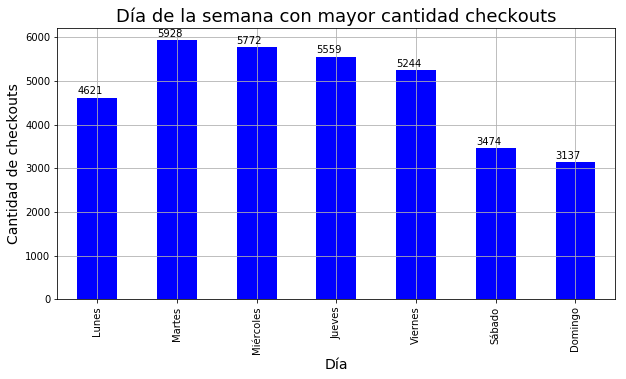

In [7]:
#Muestro la cantidad de checkouts por semana.Se puede ver que el día con mayor checkouts es el martes con un descenso de
#actividad en los siguientes días.
g = dataCheckouts['event'].groupby(dataCheckouts.timestamp.dt.weekday.map(diaSemana)).count().reindex(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']).plot(
    kind='bar', color = 'blue',figsize=(10,5), grid  = True)

g.set_title("Día de la semana con mayor cantidad checkouts", fontsize=18)
g.set_xlabel("Día",fontsize=14)
g.set_ylabel("Cantidad de checkouts", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()+75))

In [8]:
#Separo las ventas efectivamente realizadas del df.
dataVentas = dataTroca.loc[dataTroca['event'] == "conversion"]

In [9]:
#Compruebo los valores pudiendo notar una significante diferencia entre los checkouts y las ventas concretadas.
dataVentas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 220 to 1008943
Data columns (total 23 columns):
timestamp                   1172 non-null datetime64[ns]
event                       1172 non-null object
person                      1172 non-null object
url                         0 non-null object
sku                         1172 non-null object
model                       1172 non-null object
condition                   1172 non-null object
storage                     1172 non-null object
color                       1172 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     

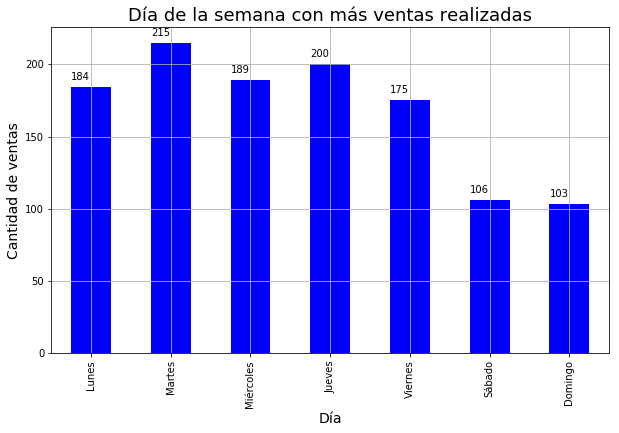

In [10]:
#Nuevamente se puede apreciar que el día de la semana con mayor cantidad de ventas es el martes pero con muy poca 
#diferencia por sobre el segundo día que es el jueves.

g = dataVentas['event'].groupby(dataVentas.timestamp.dt.weekday.map(diaSemana)).count().reindex(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']).plot(
    kind='bar', color = 'blue',figsize=(10,6), grid  = True)
g.set_title("Día de la semana con más ventas realizadas", fontsize=18)
g.set_xlabel("Día",fontsize=14)
g.set_ylabel("Cantidad de ventas", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()+5))

In [11]:
#Armo un df que contenga estos dos valores para poder compararlos.
dataMix = dataTroca
dataMix['checkouts'] = dataTroca['event'] == 'checkout'
dataMix['ventas'] = dataTroca['event'] == 'conversion'

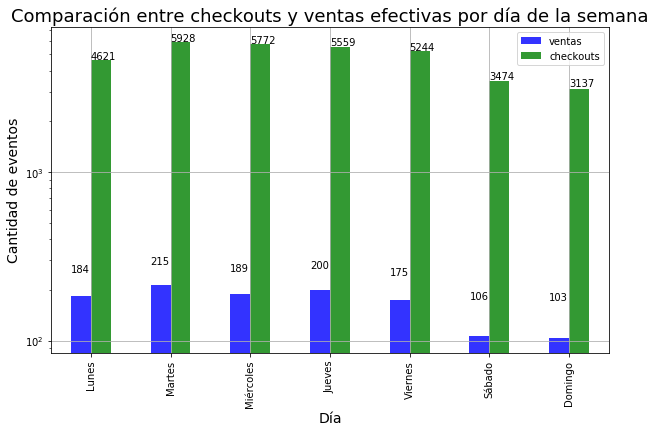

In [12]:
#Puede verse la diferencia entre la cantidad de productos en el "carrito de compras" y los productos comprados.

g = dataMix[['ventas','checkouts']].groupby(dataMix.timestamp.dt.weekday.map(diaSemana)).sum().astype(int).reindex(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']).plot(kind='bar', color = ['blue','green'],figsize=(10,6), grid  = True, alpha = 0.8, logy = True)
g.set_title("Comparación entre checkouts y ventas efectivas por día de la semana", fontsize=18)
g.set_xlabel("Día",fontsize=14)
g.set_ylabel("Cantidad de eventos", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()+70))

In [13]:
#Se puede apreciar que la URL más accedida es "/" la cual no apunta a ningún producto por lo cual no la tendré en cuenta.
dataTroca['url'].value_counts()

/                                                   28323
/comprar/iphone                                      4132
/comprar/iphone/6s                                   3393
/comprar/iphone/6                                    3228
/comprar/samsung                                     2782
/comprar/iphone/iphone-5s                            2689
/comprar/samsung/galaxy-j5                           2446
/comprar/samsung/galaxy-s7-edge                      1972
/comprar/samsung/galaxy-s8                           1499
/comprar/samsung/galaxy-j7                           1465
/comprar/samsung/galaxy-s6-edge                      1415
/comprar/motorola                                    1154
/comprar/samsung/galaxy-s7                           1139
/comprar/iphone/7                                    1120
/comprar/samsung/galaxy-s6-flat                      1067
/comprar/iphone/iphone-6s-plus                        947
/comprar/samsung/samsung-gran-prime-duos-tv           944
/comprar/samsu

In [14]:
#Elimino las URLs con "/"
dataTroca = dataTroca[dataTroca.url != '/']

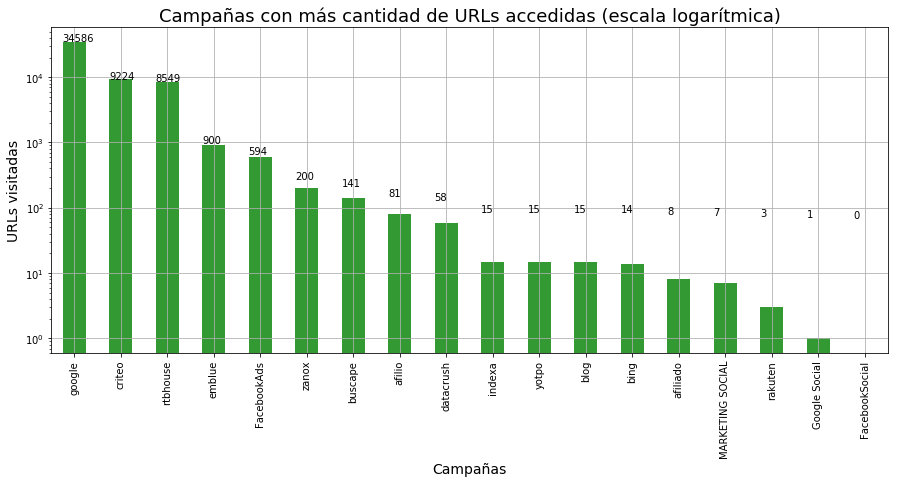

In [15]:
#Ahora muestro las campañas con mayor cantidad de URLs visitadas. Se utiliza escala logarítmica para una mejor visualización.
#Claramente Google supera al resto seguramente debido a su popularidad y en segundo lugar se encuentra Criteo, una compañía
#especializada en publicidad al igual que RTB House que ocupa el tercer lugar.

#Este análisis arroja que Trocaphone debería dejar de gastar dinero en compañías de publicidad que se encuentren
#por debajo del top 5 ya que la cantidad de visitas aportadas es ínfima.

g = dataTroca['url'].groupby(dataTroca['campaign_source']).count().sort_values(ascending = False)\
.plot(kind ='bar', color = 'green', figsize = (15,6), grid = True, logy = True, alpha = 0.8)

g.set_title("Campañas con más cantidad de URLs accedidas (escala logarítmica)", fontsize=18)
g.set_xlabel("Campañas",fontsize=14)
g.set_ylabel("URLs visitadas", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()+70))

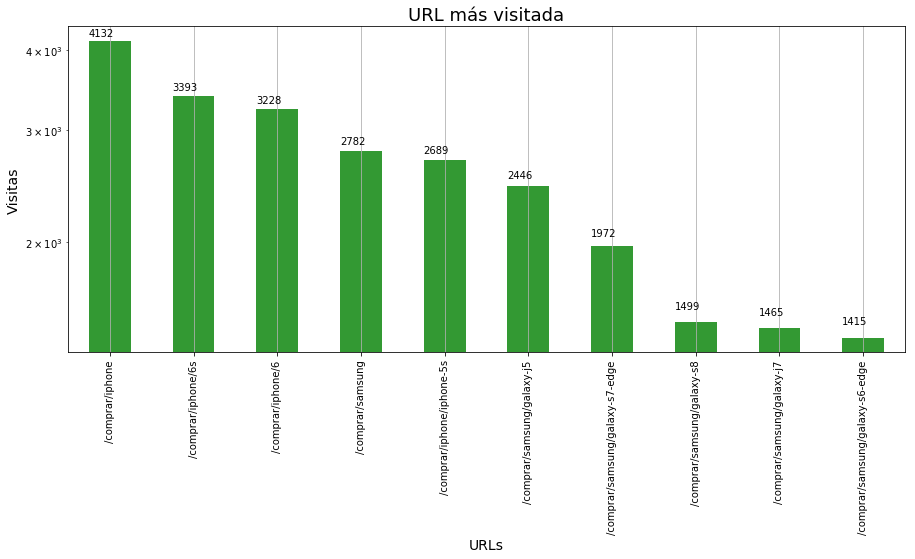

In [16]:
#Como se puede apreciar las tres primeras urls apuntan a productos Iphone, siendo la primera una búsqueda genérica y las
#dos siguientes específicas de un producto. 
#Investigando en la red se puede notar con estos valores que la gente prefiere celulares más viejos pero de marca Iphone
#en lugar de celulares más recientes de otras marcas como el samsung Galaxy S8 que ocupa el puesto 8.

dataAds = dataTroca[(dataTroca['event'] == 'ad campaign hit')]
g = dataAds['event'].groupby(dataAds['url']).count().sort_values(ascending = False)[:10].plot(kind ='bar', color = 'green', figsize = (15,6), grid = True, logy = True, alpha = 0.8)
g.set_title("URL más visitada", fontsize=18)
g.set_xlabel("URLs",fontsize=14)
g.set_ylabel("Visitas", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()+70))

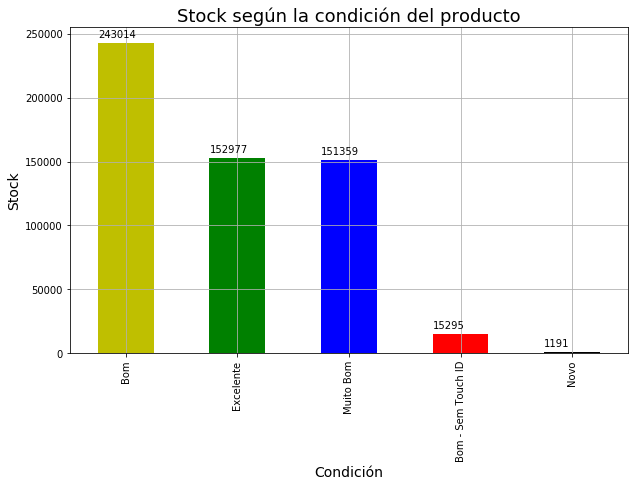

In [17]:
g = dataMix['condition'].value_counts().sort_values(ascending = False).plot(kind='bar', color = ['y', 'g', 'b', 'r', 'k'], figsize=(10,6), grid  = True)
g.set_title("Stock según la condición del producto", fontsize=18)
g.set_xlabel("Condición",fontsize=14)
g.set_ylabel("Stock", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()+4000))

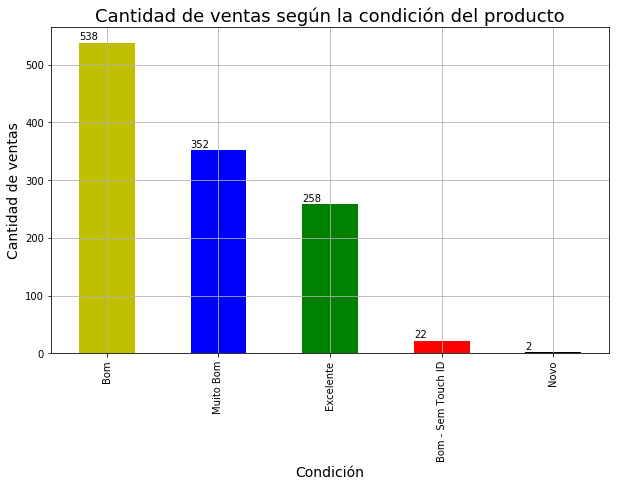

In [18]:
#Se puede notar que los usuarios eligen productos cuya la concición va desde buena a excelente, dejando de lado los
#dispositivos con fallas y totalmente nuevos.

g = dataVentas['event'].groupby(dataVentas['condition']).count().sort_values(ascending = False).plot(kind='bar', color = ['y', 'b', 'g', 'r', 'k'], figsize=(10,6), grid  = True)
g.set_title("Cantidad de ventas según la condición del producto", fontsize=18)
g.set_xlabel("Condición",fontsize=14)
g.set_ylabel("Cantidad de ventas", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()+5))